<a href="https://colab.research.google.com/github/aliasgharchakera/CUDA_Spring_2024/blob/main/Assignment2/AY06993_Assgn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 432 GPU Accelerated Programming
## Assignment 2
### Ali Asghar Yousuf
### ay06993@st.habib.edu.pk

### Initialization

#### Downloading Eigen:
We first download Eigen from the github repo.

In [1]:
!git clone https://gitlab.com/libeigen/eigen.git

Cloning into 'eigen'...
remote: Enumerating objects: 124122, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 124122 (delta 164), reused 242 (delta 149), pack-reused 123846
Receiving objects: 100% (124122/124122), 104.99 MiB | 22.88 MiB/s, done.
Resolving deltas: 100% (102781/102781), done.


#### Downloading MNIST dataset:
Next, we download the MNIST dataset from the github repository of our course.

In [2]:
!wget -P data/ -nc "https://github.com/mmmovania/CUDA_Spring_2024/raw/main/Assignment2/data/t10k-images-idx3-ubyte"
!wget -P data/ -nc "https://github.com/mmmovania/CUDA_Spring_2024/raw/main/Assignment2/data/t10k-labels-idx1-ubyte"
!wget -P data/ -nc "https://github.com/mmmovania/CUDA_Spring_2024/raw/main/Assignment2/data/train-images-idx3-ubyte"
!wget -P data/ -nc "https://github.com/mmmovania/CUDA_Spring_2024/raw/main/Assignment2/data/train-labels-idx1-ubyte"

--2024-03-10 16:10:35--  https://github.com/mmmovania/CUDA_Spring_2024/raw/main/Assignment2/data/t10k-images-idx3-ubyte
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mmmovania/CUDA_Spring_2024/main/Assignment2/data/t10k-images-idx3-ubyte [following]
--2024-03-10 16:10:36--  https://raw.githubusercontent.com/mmmovania/CUDA_Spring_2024/main/Assignment2/data/t10k-images-idx3-ubyte
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7840016 (7.5M) [application/octet-stream]
Saving to: ‘data/t10k-images-idx3-ubyte’

t10k-images-idx3-ub 100%[===================>]   7.48M  26.4MB/s    in 0.3s    

2024

#### Downloading the source code for this assignment:
Next, we download the required source files from the github repository of Assignment 2.

In [31]:
!wget -P src/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment2/ActivationAndLossFunctions.h"
!wget -P src/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment2/NeuralNetwork.h"
!wget -P src/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment2/MNIST_Solver.cpp"
!wget -P src/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment2/XOR_Solver.cpp"
!wget -P src/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment2/GpuNeuralNetwork.h"
!wget -P src/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment2/cudaHelper.cu"
!wget -P src/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment2/CUDA_MNIST_Solver.cpp"
!wget -P src/ -nc "https://github.com/aliasgharchakera/CUDA_Spring_2024/raw/main/Assignment2/CUDA_XOR_Solver.cpp"

File ‘src/ActivationAndLossFunctions.h’ already there; not retrieving.

--2024-03-10 17:54:03--  https://github.com/mmmovania/CUDA_Spring_2024/raw/main/Assignment2/NeuralNetwork.h
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mmmovania/CUDA_Spring_2024/main/Assignment2/NeuralNetwork.h [following]
--2024-03-10 17:54:03--  https://raw.githubusercontent.com/mmmovania/CUDA_Spring_2024/main/Assignment2/NeuralNetwork.h
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5060 (4.9K) [text/plain]
Saving to: ‘src/NeuralNetwork.h’

NeuralNetwork.h     100%[===================>]   4.94K  --.-KB/s    in 0s 

### CPU Implementation

#### Compiling and running XOR solver code:
We first try to confirm if our neural network is correct by implementing a XOR solver. We have already coded it for you. We invoke g++ with -I flag to pass the include directory of Eigen.

In [33]:
!g++ /content/src/XOR_Solver.cpp -I/content/eigen -o XOR_Solver
!./XOR_Solver

Using Eigen ver: 3.4.90
Samples: 4
x_train[4,2]
y_train[4,1]
Epoch 1/1000 error = 0.612697
Epoch 2/1000 error = 0.345916
Epoch 3/1000 error = 0.332768
Epoch 4/1000 error = 0.306734
Epoch 5/1000 error = 0.305043
Epoch 6/1000 error = 0.313269
Epoch 7/1000 error = 0.300799
Epoch 8/1000 error = 0.301957
Epoch 9/1000 error = 0.302025
Epoch 10/1000 error = 0.300532
Epoch 11/1000 error = 0.290423
Epoch 12/1000 error = 0.292784
Epoch 13/1000 error = 0.292392
Epoch 14/1000 error = 0.305591
Epoch 15/1000 error = 0.29755
Epoch 16/1000 error = 0.297413
Epoch 17/1000 error = 0.296192
Epoch 18/1000 error = 0.294198
Epoch 19/1000 error = 0.291643
Epoch 20/1000 error = 0.290733
Epoch 21/1000 error = 0.291133
Epoch 22/1000 error = 0.293507
Epoch 23/1000 error = 0.29539
Epoch 24/1000 error = 0.291665
Epoch 25/1000 error = 0.293914
Epoch 26/1000 error = 0.290824
Epoch 27/1000 error = 0.282713
Epoch 28/1000 error = 0.293223
Epoch 29/1000 error = 0.293341
Epoch 30/1000 error = 0.287498
Epoch 31/1000 error 

#### Compiling and running MNIST solver code:
We then compile our code using the include path of Eigen library. We invoke g++ with -I flag to pass the include directory of Eigen.

In [35]:
!g++ /content/src/MNIST_Solver.cpp -I/content/eigen -o MNIST_Solver
!./MNIST_Solver

Rows: 28, Cols: 28
Using Eigen ver: 3.4.90
x_train[60000,784]
y_train[60000,10]
Samples: 1000
x_train[1000,784]
y_train[1000,10]
Epoch 1/35 error = 0.208864
Epoch 2/35 error = 0.100195
Epoch 3/35 error = 0.0777795
Epoch 4/35 error = 0.0631701
Epoch 5/35 error = 0.0538012
Epoch 6/35 error = 0.0458544
Epoch 7/35 error = 0.0396048
Epoch 8/35 error = 0.0354864
Epoch 9/35 error = 0.0318463
Epoch 10/35 error = 0.0296629
Epoch 11/35 error = 0.0265397
Epoch 12/35 error = 0.0246611
Epoch 13/35 error = 0.0222034
Epoch 14/35 error = 0.0206709
Epoch 15/35 error = 0.0181508
Epoch 16/35 error = 0.0163656
Epoch 17/35 error = 0.0153327
Epoch 18/35 error = 0.0140544
Epoch 19/35 error = 0.0135972
Epoch 20/35 error = 0.0126761
Epoch 21/35 error = 0.0120628
Epoch 22/35 error = 0.011422
Epoch 23/35 error = 0.0110313
Epoch 24/35 error = 0.0103203
Epoch 25/35 error = 0.0100648
Epoch 26/35 error = 0.00970239
Epoch 27/35 error = 0.00911601
Epoch 28/35 error = 0.00896864
Epoch 29/35 error = 0.00866538
Epoch 30/

### GPU Implementation

#### XOR Solver using GPU

In [34]:
!nvcc src/CUDA_XOR_Solver.cpp src/cudaHelper.cu -I./eigen -o CUDA_XOR_Solver --disable-warnings
!./CUDA_XOR_Solver

Using Eigen ver: 3.4.90
Samples: 4
x_train[4,2]
y_train[4,1]
Epoch 1/1000 error = 0.612697
Epoch 2/1000 error = 0.345916
Epoch 3/1000 error = 0.332768
Epoch 4/1000 error = 0.306734
Epoch 5/1000 error = 0.305043
Epoch 6/1000 error = 0.313269
Epoch 7/1000 error = 0.300799
Epoch 8/1000 error = 0.301957
Epoch 9/1000 error = 0.302025
Epoch 10/1000 error = 0.300532
Epoch 11/1000 error = 0.290423
Epoch 12/1000 error = 0.292784
Epoch 13/1000 error = 0.292392
Epoch 14/1000 error = 0.305591
Epoch 15/1000 error = 0.29755
Epoch 16/1000 error = 0.297413
Epoch 17/1000 error = 0.296192
Epoch 18/1000 error = 0.294198
Epoch 19/1000 error = 0.291643
Epoch 20/1000 error = 0.290733
Epoch 21/1000 error = 0.291133
Epoch 22/1000 error = 0.293507
Epoch 23/1000 error = 0.29539
Epoch 24/1000 error = 0.291665
Epoch 25/1000 error = 0.293914
Epoch 26/1000 error = 0.290824
Epoch 27/1000 error = 0.282713
Epoch 28/1000 error = 0.293223
Epoch 29/1000 error = 0.293341
Epoch 30/1000 error = 0.287498
Epoch 31/1000 error 

#### MNIST Solver using GPU

In [37]:
!nvcc src/CUDA_MNIST_Solver.cpp src/cudaHelper.cu -I./eigen -o CUDA_MNIST_Solver --disable-warnings
!./CUDA_MNIST_Solver

Rows: 28, Cols: 28
Using Eigen ver: 3.4.90
x_train[60000,784]
y_train[60000,10]
Samples: 1000
x_train[1000,784]
y_train[1000,10]
Epoch 1/35 error = 0.208872
Epoch 2/35 error = 0.100199
Epoch 3/35 error = 0.0777845
Epoch 4/35 error = 0.0631736
Epoch 5/35 error = 0.0538043
Epoch 6/35 error = 0.0458572
Epoch 7/35 error = 0.0396098
Epoch 8/35 error = 0.0354885
Epoch 9/35 error = 0.0318486
Epoch 10/35 error = 0.0296671
Epoch 11/35 error = 0.0265437
Epoch 12/35 error = 0.0246655
Epoch 13/35 error = 0.0222104
Epoch 14/35 error = 0.0206874
Epoch 15/35 error = 0.0181652
Epoch 16/35 error = 0.0163757
Epoch 17/35 error = 0.0153376
Epoch 18/35 error = 0.0140618
Epoch 19/35 error = 0.0136381
Epoch 20/35 error = 0.0126689
Epoch 21/35 error = 0.012064
Epoch 22/35 error = 0.0115087
Epoch 23/35 error = 0.0110802
Epoch 24/35 error = 0.0104355
Epoch 25/35 error = 0.0101787
Epoch 26/35 error = 0.00978887
Epoch 27/35 error = 0.00914952
Epoch 28/35 error = 0.00896471
Epoch 29/35 error = 0.00865474
Epoch 30/

### Results

#### XOR Results

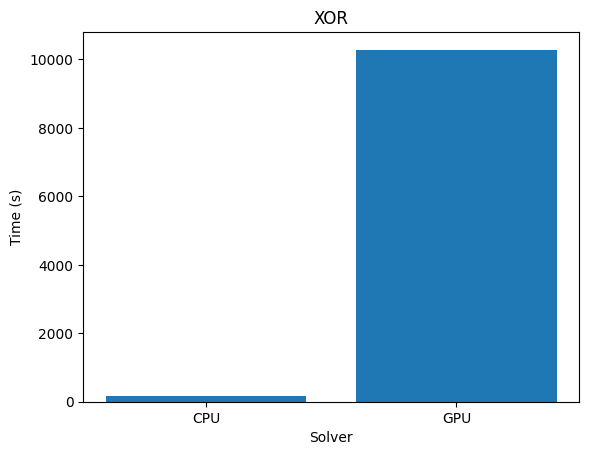

In [38]:
import matplotlib.pyplot as plt

# XOR
x = ["CPU", "GPU"]
# Read the data from the file and average the time
with open("cpu_xor.txt", "r") as f:
    cpu_xor = [float(i) for i in f.readlines()]
    cpu_xor = sum(cpu_xor) / len(cpu_xor)

with open("gpu_xor.txt", "r") as f:
    gpu_xor = [float(i) for i in f.readlines()]
    gpu_xor = sum(gpu_xor) / len(gpu_xor)

y = [cpu_xor, gpu_xor]
plt.bar(x, y)
plt.title("XOR")
plt.xlabel("Solver")
plt.ylabel("Time (s)")
plt.show()

We see that the time taken by our custom neural network is much higher than the time taken by the neural network in the Eigen library. This is because the Eigen library is highly optimized and while our code leverages the GPU for matrix operations, it is not as optimized as the Eigen library.

#### MNIST Results

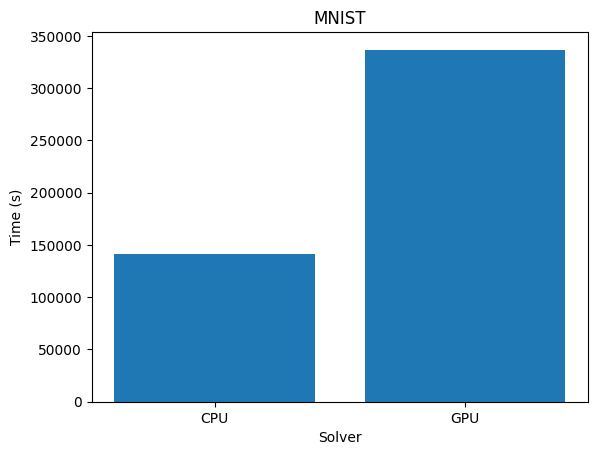

In [39]:
import matplotlib.pyplot as plt

# MNIST
x = ["CPU", "GPU"]
# Read the data from the file and average the time
with open("cpu_mnist.txt", "r") as f:
    cpu_mnist = [float(i) for i in f.readlines()]
    cpu_mnist = sum(cpu_mnist) / len(cpu_mnist)

with open("gpu_mnist.txt", "r") as f:
    gpu_mnist = [float(i) for i in f.readlines()]
    gpu_mnist = sum(gpu_mnist) / len(gpu_mnist)

y = [cpu_mnist, gpu_mnist]
plt.bar(x, y)
plt.title("MNIST")
plt.xlabel("Solver")
plt.ylabel("Time (s)")
plt.show()

We see similar results for the MNIST dataset as well. The overhead of copying the data to the GPU and back to the CPU is much higher than the time taken by the CPU to perform the matrix operations. This is why we see that the time taken by our custom neural network is much higher than the time taken by the neural network in the Eigen library.

### Improvements

We can improve our code by leveraging the different memory levels of the GPU. We can use shared memory to store the input and output of the layers and use the global memory to store the weights and biases. This will reduce the overhead of copying the data to the GPU and back to the CPU. We can also speed up the processing by using more efficient kernel configurations.